#### Exploratory Data Analysis - Software Development Tools

 in this project, we will explore the vehicle dataset and try to find some interesting insights.


In [36]:
import pandas as pd 
import streamlit as st 
import plotly.express as px 
import matplotlib.pyplot as plt
import seaborn as sns

      # Exploring data

In [38]:
df = pd.read_csv('vehicles_us.csv')
df.head(10)

price  model_year           model  condition  cylinders fuel  odometer  \
0   9400      2011.0          bmw x5       good        6.0  gas  145000.0   
1  25500         NaN      ford f-150       good        6.0  gas   88705.0   
2   5500      2013.0  hyundai sonata   like new        4.0  gas  110000.0   
3   1500      2003.0      ford f-150       fair        8.0  gas       NaN   
4  14900      2017.0    chrysler 200  excellent        4.0  gas   80903.0   
5  14990      2014.0    chrysler 300  excellent        6.0  gas   57954.0   
6  12990      2015.0    toyota camry  excellent        4.0  gas   79212.0   
7  15990      2013.0     honda pilot  excellent        6.0  gas  109473.0   
8  11500      2012.0     kia sorento  excellent        4.0  gas  104174.0   
9   9200      2008.0     honda pilot  excellent        NaN  gas  147191.0   

  transmission    type paint_color  is_4wd date_posted  days_listed  
0    automatic     SUV         NaN     1.0  2018-06-23           19  
1    automatic  pickup       white     1.0  2018-10-19           50  
2    automatic   sedan         red     NaN  2019-02-07           79  
3    automatic  pickup         NaN     NaN  2019-03-22            9  
4    automatic   sedan       black     NaN  2019-04-02           28  
5    automatic   sedan       black     1.0  2018-06-20           15  
6    automatic   sedan       white     NaN  2018-12-27           73  
7    automatic     SUV       black     1.0  2019-01-07           68  
8    automatic     SUV         NaN     1.0  2018-07-16           19  
9    automatic     SUV        blue     1.0  2019-02-15           17

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [41]:
df.isnull().sum()

price               0
model_year       3619
model               0
condition           0
cylinders        5260
fuel                0
odometer         7892
transmission        0
type                0
paint_color      9267
is_4wd          25953
date_posted         0
days_listed         0
dtype: int64

By running this command, We can see that we have a five-column that contains the missing value.

So now let's fill  the column which contains the datatype int64('model_year,'  'cylinders,'' odometer,'  'is_4wd') with the int " 0 "
and the one that a datatype is an object by "unknown"

# cleanning the data

In [42]:

fillna_int = ['is_4wd', 'cylinders', 'model_year', 'odometer']
for i in fillna_int:
  df[i] = df[i].fillna(0)
  df[i] = df[i].astype(int)
    
df["paint_color"] = df["paint_color"].fillna("unknown")

In [43]:
df.isnull().sum()

price           0
model_year      0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
transmission    0
type            0
paint_color     0
is_4wd          0
date_posted     0
days_listed     0
dtype: int64

In [44]:
df.duplicated().sum()

0

there is no duplicated row in this data

In [45]:
# Extract the manufacturer from the model and store it in a new column
df["manufacturer"] = df["model"].str.split(" ", n = 1, expand = True)[0]

In [46]:
# Extract the model name from the model and store it in a new column
df["model_name"] = df["model"].str.split(" ", n = 1, expand = True)[1]


In [47]:
# Delete the model column
df.drop(columns=["model"], inplace=True)

In [48]:
df.sample(5)

price  model_year  condition  cylinders fuel  odometer transmission  \
15352   9000        2015   like new          4  gas     75000    automatic   
15479  21000        2015  excellent          8  gas         0    automatic   
6851    6400        2008  excellent          8  gas         0    automatic   
49600   3900        2005       good          4  gas    125000    automatic   
46102  17888        2013  excellent          6  gas    104879    automatic   

            type paint_color  is_4wd date_posted  days_listed manufacturer  \
15352      sedan     unknown       0  2019-01-25           12    chevrolet   
15479     pickup         red       1  2018-10-23            7          ram   
6851       truck       white       0  2018-08-30           17         ford   
49600  hatchback        blue       0  2018-08-02           12         ford   
46102     pickup       black       1  2018-11-30           47          ram   

      model_name  
15352     malibu  
15479       1500  
6851       f-150  
49600      focus  
46102       1500

# Filtering the data

In [55]:
#creating filtered data by manufacturer and year

manufactuer_choice = df['manufacturer'].unique()
manufactuer_choice

array(['bmw', 'ford', 'hyundai', 'chrysler', 'toyota', 'honda', 'kia',
       'chevrolet', 'ram', 'gmc', 'jeep', 'nissan', 'subaru', 'dodge',
       'mercedes-benz', 'acura', 'cadillac', 'volkswagen', 'buick'],
      dtype=object)

In [56]:
#creating filtered data by manufacturer and year
manufacturer_choice=df['manufacturer'].unique()
selected_manufacturer = st.selectbox('Select manufacturer:', manufacturer_choice)


In [57]:
min_year,max_year=int(df['model_year'].min()),int(df['model_year'].max())
year_range = st.slider(
     "Choose years",
     value=(min_year,max_year),min_value=min_year,max_value=max_year )

actual_range=list(range(year_range[0],year_range[1]+1))


filtered_type=df[(df.manufacturer==selected_manufacturer)&(df.model_year.isin(list(actual_range)))]

st.table(filtered_type)

DeltaGenerator()

# visualizing the data

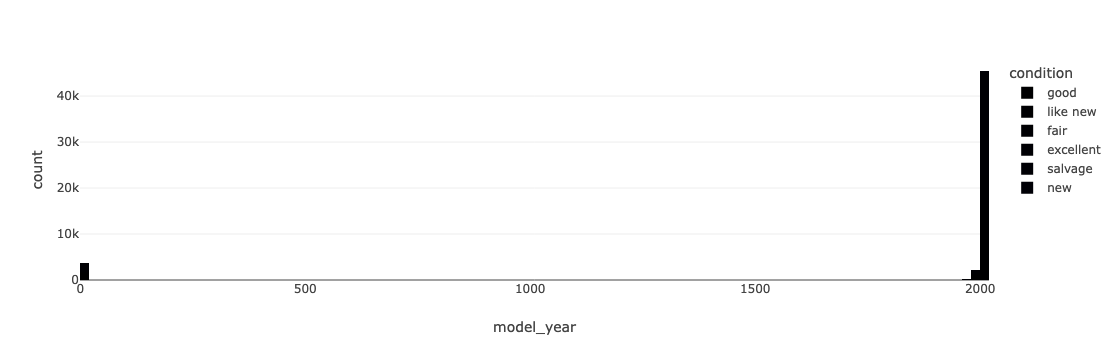

In [52]:
fig = px.histogram(df, x="model_year", color="condition", hover_data=df.columns)
fig.show()


The graph above shows that as the car's year increases, the condition becomes better.

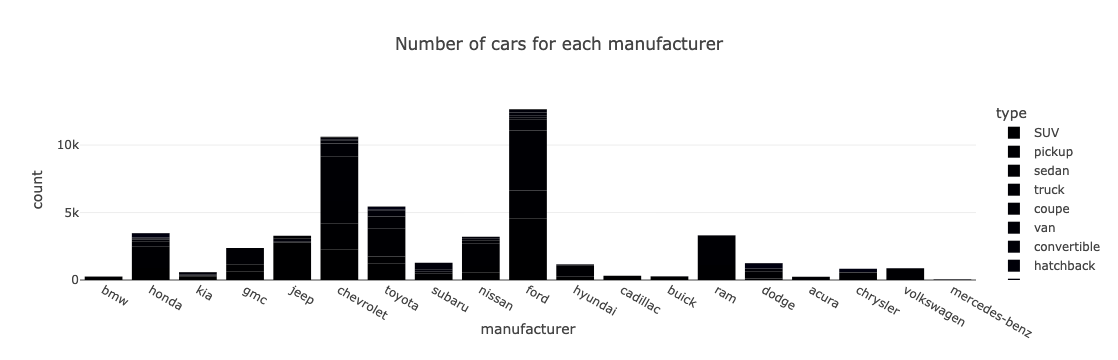

In [59]:
fig = px.histogram(df, x="manufacturer", color="type", title="Number of cars for each manufacturer")
fig.show()

As shown above, Ford and Chevrolet are the most popular brands. 

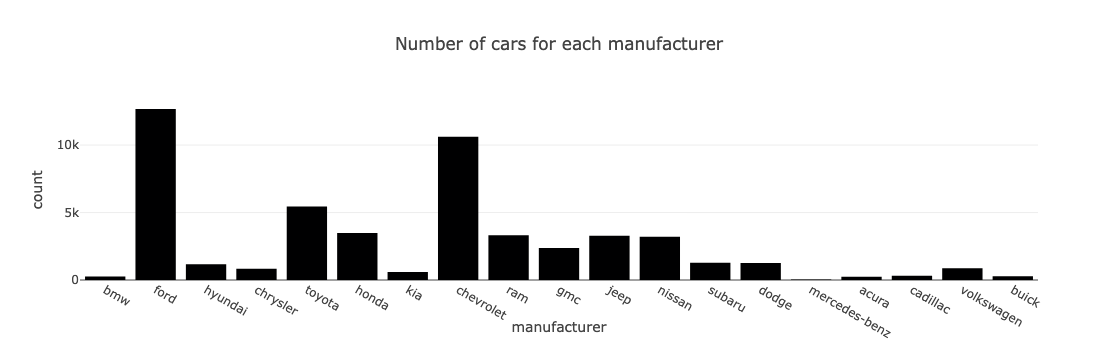

In [60]:
fig = px.histogram(df, x="manufacturer", title="Number of cars for each manufacturer")
fig.show()